In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.externals import joblib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read source data
data_training = pd.read_csv('/mnt/disks/disk1/data-training.csv')
data_transformed = pd.read_pickle('/mnt/disks/disk1/data_train_dct_volume.pkl')

In [10]:
from sklearn.impute import SimpleImputer

size_cols = data_training.columns.str.contains('Size')
rate_cols = data_training.columns.str.contains('Rate')

imp_zero = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
data_training.loc[:, size_cols] = imp_zero.fit_transform(data_training.loc[:, size_cols])

# Impute all rates (xxxRateX) with mean value
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data_training.loc[:, rate_cols] = imp_mean.fit_transform(data_training.loc[:, rate_cols])

In [11]:
from sklearn.decomposition import PCA

#Data training PCA
rate_cols = data_training.columns[data_training.columns.str.contains('Rate')]
size_cols = data_training.columns[data_training.columns.str.contains('Size')]

rates_PCA = PCA(n_components=1)
rates_PCA.fit(data_training[rate_cols])
print(rates_PCA.explained_variance_ratio_)

data_training['ratePCA1'] = rates_PCA.transform(data_training[rate_cols])

[0.99972893]


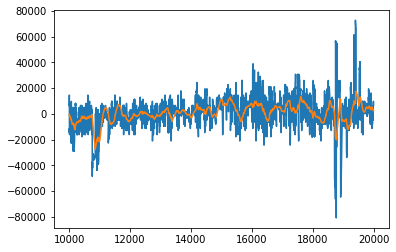

In [10]:
plt.plot(data_transformed['bidAskVolume0'][10000:20000])
plt.plot(data_transformed['bidAskVolume0_dct_mw_1000_5'][10000:20000])

In [6]:
size_PCA = PCA(n_components=1)
size_PCA.fit(np.log(data_training[size_cols]+1))
print(size_PCA.explained_variance_ratio_)


[0.12911124]


In [12]:
#Create data imputers
size_cols = data_training.columns.str.contains('Size')
rate_cols = data_training.columns.str.contains('Rate')

imp_zero = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_zero.fit(data_training.loc[:, size_cols])
imp_mean.fit(data_training.loc[:, rate_cols])

#joblib.dump(imp_mean, 'mean_imputer.pkl') 

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [5]:
#Small dump of source data
data_training[:5000].to_csv('data_training_5k.csv', index=False, header=True)
data_training[:10000].to_csv('data_training_10k.csv', index=False, header=True)
data_training[:20000].to_csv('data_training_20k.csv', index=False, header=True)

In [5]:
#DCT data
data_dct = pd.read_csv('./XTX_Structure/python/dct_results.csv')
data_dct.columns

Index(['askRate0', 'askRate1', 'askRate2', 'askRate3', 'askRate4', 'askRate5',
       'askRate6', 'askRate7', 'askRate8', 'askRate9',
       ...
       'bidRate5_dct_mw_10000_50_delta', 'bidRate6_dct_mw_10000_50_delta',
       'bidRate7_dct_mw_10000_50_delta', 'bidRate8_dct_mw_10000_50_delta',
       'bidRate9_dct_mw_10000_50_delta', 'bidRate10_dct_mw_10000_50_delta',
       'bidRate11_dct_mw_10000_50_delta', 'bidRate12_dct_mw_10000_50_delta',
       'bidRate13_dct_mw_10000_50_delta', 'bidRate14_dct_mw_10000_50_delta'],
      dtype='object', length=300)

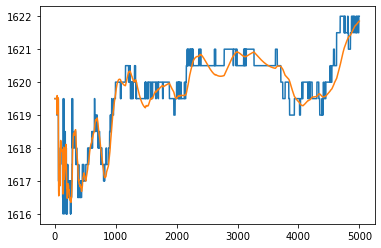

In [6]:
plt.plot(data_dct.askRate0)
plt.plot(data_dct.askRate0_dct_mw_10000_10)

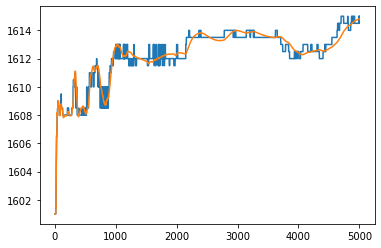

In [7]:
plt.plot(data_dct.bidRate13)
plt.plot(data_dct.bidRate13_dct_mw_10000_10)

In [16]:
for i in range(15):
    data_training['bidAskVolume{}'.format(i)] = data_training['bidRate{}'.format(i)] * data_training['bidSize{}'.format(i)] - \
    data_training['askRate{}'.format(i)] * data_training['askSize{}'.format(i)]

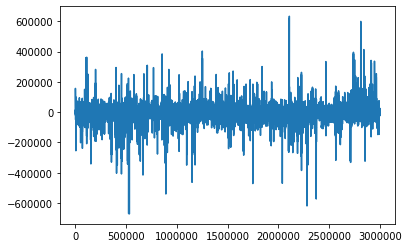

In [17]:
plt.plot(data_training['bidAskVolume0'])